In [ ]:
import io
from IPython.nbformat import current

def execute_notebook(nbfile):
    
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    
    ip = get_ipython()
    
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)


In [ ]:
execute_notebook("util.ipynb")

In [5]:
    def monthlyOptionBuyusingBhavCopy():
        database = "C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData"
        print(os.getcwd())
        print(os.listdir())
        local_start_date = start_date
        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()
      
        delta = relativedelta(years=+1)
        #monthly_expirty_date = getMonthlyExpirtyDate()
        monthly_expirty_date = expiry_list
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}

        try:
            while local_start_date <= end_date:
                val =0
                print(str(symbol)+str(local_start_date.year)+".csv")
                filename = str(symbol)+str(local_start_date.year)+".csv"
                fname = os.path.join(database,filename)
                fname_day = os.path.join(database,filename)
                df = pd.read_csv(fname)
                df = df.loc[df['SYMBOL']== symbol]
                df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m-%d')
                df['Year_month'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')
                df['EXPIRY_DT'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m-%d')
                df['EXPIRY_DT_Year_month'] = pd.to_datetime(df['EXPIRY_DT']).dt.strftime('%Y-%m')
                formatted_banknifyt_df = df[ df['Year_month'] == df['EXPIRY_DT_Year_month'] ]
                #print(formatted_banknifyt_df)
                # below row is to get only montly expirty date colums from data frame
                formatted_banknifyt_df= formatted_banknifyt_df[ formatted_banknifyt_df['EXPIRY_DT'].isin(monthly_expirty_date)]
                formated_option_df_group = formatted_banknifyt_df.groupby('Year_month')

                for name , group in formated_option_df_group :
                    #print(name)
                    future_logic_df = group[group['INSTRUMENT']=='FUTIDX']
                    future_logic_df = future_logic_df.iloc[[0]]
                    strike_price = (future_logic_df['OPEN']- (future_logic_df['OPEN'])%100).astype(int).min()
                    #print("Strile price is ",strike_price)
                    option_df = group[group['INSTRUMENT']=='OPTIDX']
                    option_df = option_df[option_df['STRIKE_PR']==strike_price]
                    month_option_df_ce = option_df[option_df['OPTION_TYP'].isin(['CE'])]
                    month_option_df_pe = option_df[option_df['OPTION_TYP'].isin(['PE'] )]                                                              
                    month_option_df_ce = month_option_df_ce.iloc[[0,-1]]
                    month_option_df_pe = month_option_df_pe.iloc[[0,-1]]
                    month_option_df_ce_buy = month_option_df_ce.iloc[[0]]['OPEN'].min()
                    month_option_df_ce_sell =month_option_df_ce.iloc[[-1]]['CLOSE'].min()
                    month_option_df_pe_buy = month_option_df_pe.iloc[[0]]['OPEN'].min()
                    month_option_df_pe_sell =month_option_df_pe.iloc[[-1]]['CLOSE'].min()
                    #print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
                    pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
                    #print("pandl",pandl,abs(pandl*slipage/100))
                    pandl = pandl - abs(pandl*slipage/100)
                    #print("pandl",pandl)
                    if cum_p_N_L_list:
                        #print("inlistelse ",val)
                        val = cum_p_N_L_list[-1]        

                    p_N_L_list.append(pandl)
                    cum_p_N_L_list.append(val+pandl)   
                    year_month_list.append(name)
                    P_N_L_dic.update({name :[name,name,strike_price,month_option_df_ce_buy
                                               ,month_option_df_pe_buy,month_option_df_ce_sell,month_option_df_pe_sell,
                                                month_option_df_ce_sell-month_option_df_ce_buy,
                                                month_option_df_pe_sell-month_option_df_pe_buy,pandl,val+pandl]})

                banknifty= banknifty.append(formatted_banknifyt_df)
                #print("r",fname)

                local_start_date += delta

            #print(year_month_list)
            #print(p_N_L_list)
            #print(cum_p_N_L_list)
            month_profit_loss = pd.DataFrame(P_N_L_dic)
            month_profit_loss = month_profit_loss.transpose()
            month_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                                   'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
            
        except Exception as error:
            print("File not found {0}".format(error))
        print(month_profit_loss)
        return month_profit_loss

    

C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
BANKNIFTY2014.csv
BANKNIFTY2015.csv
BANKNIFTY2016.csv
BANKNIFTY2017.csv
BANKNIFTY2018.csv
BANKNIFTY2019.csv
BANKNIFTY2020.csv
BANKNIFTY2021.csv
        Buy_date Sell_Date Strike_price Call__buy_price Put_buy_price Call_sell_price Put_sell_price Call_PandL Put_PandL Total_PandL   Cum_PandL
2014-01  2014-01   2014-01        11400           358.0        264.15           241.3          384.4     -116.

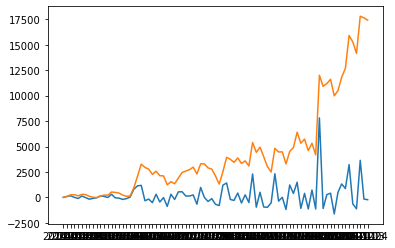

In [6]:
    
    month_profit_loss = monthlyOptionBuyusingBhavCopy()
    plt.plot(month_profit_loss['Buy_date'], month_profit_loss['Total_PandL'],month_profit_loss['Cum_PandL'])
    plt.show()
    pandlFile =str(symbol)+"monthly_option_buy_Bhavcopy_Pandl.csv"
    month_profit_loss.to_csv(pandlFile)
  


In [7]:
    def monthlyOptionBuyusingNsePy():
        print(os.getcwd())
        print(os.listdir())

        banknifty = pd.DataFrame()
        formatted_banknifyt_df = pd.DataFrame(['Year_month','P&L'])
        month_profit_loss = pd.DataFrame()

        delta = relativedelta(years=+1)
        #monthly_expirty_date =getMonthlyExpirtyFromBahvcopy()
        #monthly_expirty_date = getMonthlyExpirtyDate()
        #print("monthly_expirty_date",monthly_expirty_date)
        year_month_list =[]
        p_N_L_list =[]
        cum_p_N_L_list =[]
        slipage = 5
        P_N_L_dic =  {}
        # code using nsepy to make sure its bhavcopy is giving matching result

        banknifty = pd.DataFrame()
        
        for current_expiry_date in  expiry_list:
            try:
                val =0
                expiry_day = datetime.datetime.strptime(current_expiry_date,'%Y-%m-%d')
                #print(expiry_day)
                first_day_of_the_month = expiry_day.replace(day=1)
                first_day_of_the_month =checkfirstTradyingDayofMonth(first_day_of_the_month,expiry_day)
                #print(first_day_of_the_month)
                nifty_fut = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    futures=True,
                                    expiry_date=expiry_day)
                strike_price = (nifty_fut['Open']- (nifty_fut['Open'])%100).astype(float).min()
                #print(strike_price)

                buy_opt_ce = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    option_type='CE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                buy_opt_pe = nsepy.get_history(symbol=symbol,
                                    start=first_day_of_the_month,
                                    end=first_day_of_the_month,
                                    index=True,
                                    option_type='PE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)
                sell_opt_ce = nsepy.get_history(symbol=symbol,
                                    start=expiry_day,
                                    end=expiry_day,
                                    index=True,
                                    option_type='CE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                sell_opt_pe = nsepy.get_history(symbol=symbol,
                                    start=expiry_day,
                                    end=expiry_day,
                                    index=True,
                                    option_type='PE',
                                    strike_price=strike_price,
                                    expiry_date=expiry_day)

                month_option_df_ce_buy = buy_opt_ce.iloc[[0]]['Open'].min().astype(float)
                month_option_df_ce_sell =sell_opt_ce.iloc[[0]]['Close'].min().astype(float)
                month_option_df_pe_buy = buy_opt_pe.iloc[[0]]['Open'].min().astype(float)
                month_option_df_pe_sell =sell_opt_pe.iloc[[0]]['Close'].min().astype(float)

                #print(month_option_df_ce_sell,month_option_df_ce_buy,month_option_df_pe_sell,month_option_df_pe_buy)
                pandl = (month_option_df_ce_sell-month_option_df_ce_buy)+ (month_option_df_pe_sell-month_option_df_pe_buy)
                #print("pandl",pandl,abs(pandl*slipage/100))
                pandl = pandl - abs(pandl*slipage/100).astype(float)
                #print("pandl",pandl)
                if cum_p_N_L_list:
                        print("inlistelse ",val)
                        val = cum_p_N_L_list[-1]        

                p_N_L_list.append(pandl)
                cum_p_N_L_list.append(val+pandl)   
                year_month_list.append(expiry_day)
                P_N_L_dic.update({expiry_day :[first_day_of_the_month,expiry_day,strike_price,month_option_df_ce_buy
                                               ,month_option_df_pe_buy,month_option_df_ce_sell,month_option_df_pe_sell,
                                                month_option_df_ce_sell-month_option_df_ce_buy,
                                                month_option_df_pe_sell-month_option_df_pe_buy,pandl,val+pandl]})


            except Exception as error:
                print("File not found {0}".format(error))
        #print(p_N_L_list)
        #print(cum_p_N_L_list)
        month_profit_loss = pd.DataFrame(P_N_L_dic)
        month_profit_loss = month_profit_loss.transpose()
        month_profit_loss.columns =['Buy_date','Sell_Date','Strike_price','Call__buy_price','Put_buy_price','Call_sell_price',
                                   'Put_sell_price','Call_PandL','Put_PandL','Total_PandL','Cum_PandL']
        print(month_profit_loss)
        return month_profit_loss



C:\Users\sanjo\PycharmProjects\mokshtech\stock_predictor\optionvaluecalculation\strategies
['.ipynb_checkpoints', 'BANKNIFTYmonthly_option_buy_Bhavcopy_Pandl.csv', 'BANKNIFTYmonthly_option_buy_nsepy_Pandl.csv', 'df.csv', 'forwordvolatility.py', 'input.csv', 'monthlyoptionbuying.ipynb', 'monthy_nifty_option_buy_Bhavcopy_Pandl.csv', 'monthy_nifty_option_buy_nsepy_Pandl.csv', 'NIFTY.csv', 'preDefinedStrategies', 'straddle.py', 'strategies.py', 'weeklyOptionBuy.ipynb', 'weeklyOptionBuy_Selladditon.ipynb', 'weekly_banknifty_option_buy_Pandl.csv', 'weekly_nifty_option_buy_Pandl.csv', '__init__.py']
inlistelse  0
inlistelse  0
File not found positional indexers are out-of-bounds
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse  0
inlistelse 

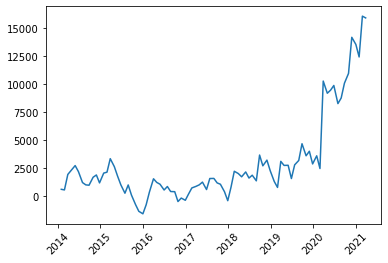

In [8]:

    month_profit_loss =monthlyOptionBuyusingNsePy()
    plt.xticks(rotation=45)

    plt.plot(month_profit_loss['Sell_Date'], month_profit_loss['Cum_PandL'])
    plt.show()
    pandlFile =str(symbol)+"monthly_option_buy_nsepy_Pandl.csv"
    month_profit_loss.to_csv(pandlFile)

In [20]:
amount = 400000
month_profit_loss.shape
month_profit_loss["amount_to_invest"] = amount
month_profit_loss["Option_buy_contracts"] = (month_profit_loss["amount_to_invest"]/(( month_profit_loss["Call__buy_price"]+month_profit_loss["Put_buy_price"]))).astype(int)
month_profit_loss["Total_PandL_for_all_contracts"] =month_profit_loss["Total_PandL"]*month_profit_loss["Option_buy_contracts"]
print(month_profit_loss["Total_PandL_for_all_contracts"].sum().astype(float))
result =cagr(amount,month_profit_loss["Total_PandL_for_all_contracts"].sum().astype(float),4)
print("{:.2%}".format(result))
month_profit_loss['Year_month'] = pd.to_datetime(month_profit_loss['Sell_Date']).dt.strftime('%Y')

month_profit_loss.groupby('Year_month').agg({"Total_PandL_for_all_contracts": [min,max,sum],
                                            "Call_PandL": [min,max],
                                            "Put_PandL": [min,max],
                                             })


6575955.975
154.27%


Total_PandL_for_all_contracts                            Call_PandL          Put_PandL         
                                     min          max           sum        min      max       min      max
Year_month                                                                                                
2014                         -407774.640  1193342.025  1.245740e+06    -524.70  1680.00   -584.90   986.00
2015                         -391983.690   472335.820 -1.187201e+06    -599.95  1292.80   -519.60  1761.55
2016                         -409199.280   626451.375  7.681135e+05    -509.95  1641.90   -416.90  1584.65
2017                         -405063.120   573633.750  3.806961e+04    -439.55  1338.35   -444.30   447.85
2018                         -381176.145  1227746.845  1.675969e+06    -574.60  1581.45   -579.15  2804.90
2019                         -412584.900   969366.320  4.054205e+05    -694.80  2903.70   -862.40  1803.55
2020                         -310947.840  2265987.500  3.191693e+06    -998.25  4384.15  -1845.00  9060.50
2021                         -228939.900   692858.275  4.381517e+05   -1193.55  4799.95   -961.40  1043.00

In [21]:
   month_profit_loss

,Buy_date,Sell_Date,Strike_price,Call__buy_price,Put_buy_price,Call_sell_price,Put_sell_price,Call_PandL,Put_PandL,Total_PandL,Cum_PandL,amount_to_invest,Option_buy_contracts,Total_PandL_for_all_contracts,Year_month
2014-01-30,2014-01-01,2014-01-30,11400.0,358.0,264.15,0.05,1250.15,-357.95,986.0,596.6475,596.6475,400000,642,383047.695,2014
2014-02-26,2014-02-03,2014-02-26,10200.0,302.3,285.1,535.55,0.1,233.25,-285.0,-54.3375,542.31,400000,680,-36949.5,2014
2014-03-27,2014-03-03,2014-03-27,10700.0,241.0,222.9,1921.0,0.15,1680.0,-222.75,1384.3875,1926.6975,400000,862,1193342.025,2014
2014-05-29,2014-05-02,2014-05-29,13000.0,622.0,585.0,2038.45,0.1,1416.45,-584.9,789.9725,2716.67,400000,331,261480.8975,2014
2014-06-26,2014-06-02,2014-06-26,14700.0,450.95,400.0,339.0,0.1,-111.95,-399.9,-537.4425,2179.2275,400000,470,-252597.975,2014
2014-07-31,2014-07-01,2014-07-31,15300.0,530.05,430.05,5.35,21.2,-524.7,-408.85,-980.2275,1199.0,400000,416,-407774.64,2014
2014-08-28,2014-08-01,2014-08-28,15200.0,350.0,378.55,533.4,0.1,183.4,-378.45,-204.8025,994.1975,400000,549,-112436.5725,2014
2014-09-25,2014-09-01,2014-09-25,15800.0,278.6,274.95,0.4,522.3,-278.2,247.35,-32.3925,961.805,400000,722,-23387.385,2014
2014-10-30,2014-10-01,2014-10-30,15400.0,311.9,283.0,1344.35,0.05,1032.45,-282.95,712.025,1673.83,400000,672,478480.8,2014
2014-11-27,2014-11-03,2014-11-27,17100.0,399.95,304.95,919.75,0.05,519.8,-304.9,204.155,1877.985,400000,567,115755.885,2014



NIFTY2021.csv
Strile price is  14000
0.2 310.0 186.4 299.75
pandl -423.15 21.1575
pandl -444.3075
Strile price is  13700
1400.35 461.65 0.1 330.25
pandl 608.55 30.4275
pandl 578.1225
inlistelse  0
Strile price is  14700
0.15 388.5 358.9 422.2
pandl -451.65000000000003 22.5825
pandl -474.2325
inlistelse  -444.3075
Strile price is  14800
140.3 335.7 292.05 282.7
pandl -186.04999999999995 9.302499999999998
pandl -195.35249999999996
inlistelse  133.81499999999994
r C:/Users/sanjo/PycharmProjects/mokshtech/stock_predictor/database/optionData\NIFTY2021.csv
[-444.3075, 578.1225, -474.2325, -195.35249999999996]
[-444.3075, 133.81499999999994, -340.4175000000001, -535.77]

2021-01-28 00:00:00
2021-01-01 00:00:00
14000.0
0.2 310.0 186.4 299.75
pandl -444.3075
2021-02-25 00:00:00
2021-02-01 00:00:00
13700.0
1400.35 461.65 0.1 330.25
pandl 578.1225
inlistelse  0
2021-03-25 00:00:00
2021-03-01 00:00:00
14700.0
0.15 388.5 358.9 422.2
pandl -474.2325
inlistelse  0
2021-04-29 00:00:00
2021-04-01 00:00:00
14800.0
File not found positional indexers are out-of-bounds
[-444.3075, 578.1225, -474.2325]
[-444.3075, 133.81499999999994, -340.4175000000001]
